<a href="https://colab.research.google.com/github/Hyang0219/Dog-Visioner/blob/main/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Visioner

## Data preprocessing

### Data loading

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print(tf.__version__)
print(hub.__version__)

2.3.0
0.10.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

labels = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,9c010ac92006c01fd68602e4a896ba28,scottish_deerhound
freq,1,126


In [ ]:
labels["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

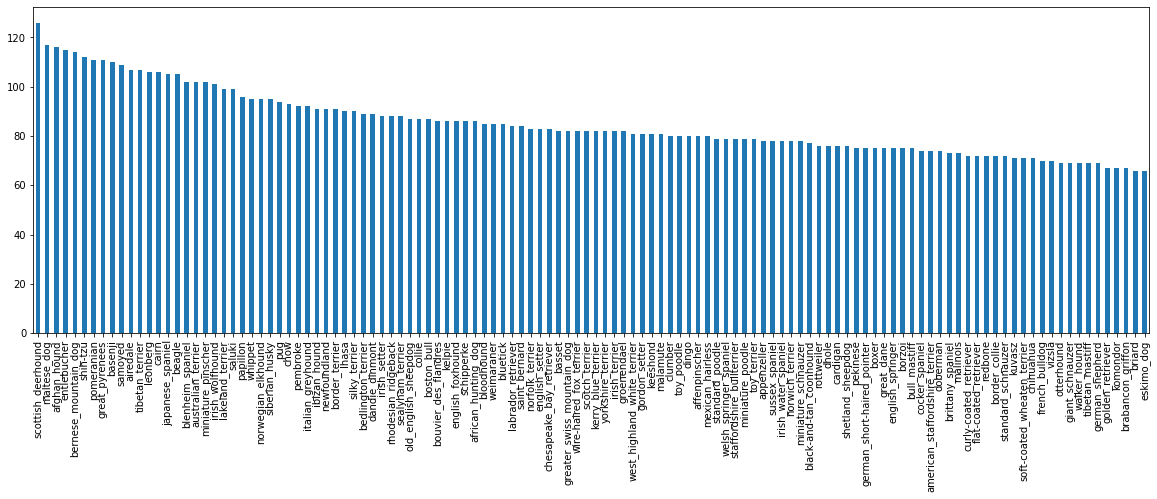

In [ ]:
labels["breed"].value_counts().plot(kind="bar", figsize=(20,6));

In [ ]:
labels["breed"].value_counts().median()

82.0

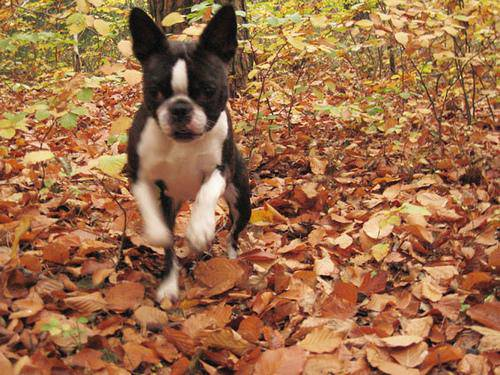

In [ ]:
from IPython.display import Image
Image('drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [ ]:
import os
files = os.listdir("drive/My Drive/Dog Vision/train")
filenames = ["drive/My Drive/Dog Vision/train/" + filenames + ".jpg" for filenames in labels["id"]]
filenames[:5]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

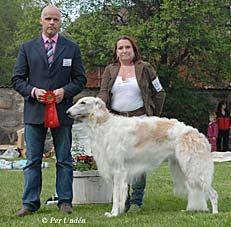

In [ ]:
Image(filenames[7])

In [ ]:
len(files) == len(filenames)

True

In [ ]:
unique_labels = np.unique(labels["breed"])
len(unique_labels)

120

In [ ]:
labels["breed"][0] == unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
labels_bool = [label == unique_labels for label in labels["breed"]]
labels_bool[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
len(filenames), len(labels_bool)

(10222, 10222)

### Image Processing

In [ ]:
from sklearn.model_selection import train_test_split
import random

In [ ]:
test_size = 1000
X = filenames[:test_size]
y = labels_bool[:test_size]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 7)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/train/0eafdcc7628b2c74983819f40c763c2f.jpg',
  'drive/My Drive/Dog Vision/train/01ee3c7ff9bcaba9874183135877670e.jpg',
  'drive/My Drive/Dog Vision/train/03ca2c79345f4c27232ed5b0dc2821c2.jpg',
  'drive/My Drive/Dog Vision/train/0a3f1898556115d6d0931294876cd1d9.jpg',
  'drive/My Drive/Dog Vision/train/12a2e809d7f15298050f3798c018c395.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

In [ ]:
from tensorflow import io
from tensorflow import image

image_height = 224
image_width = 224

def decode_img(file_path, image_size=[image_height, image_width]):
  img = tf.io.read_file(file_path)
  img = tf.io.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, image_size)
  return img

In [ ]:
def process_image(file_path, label_bool):
  image = decode_img(file_path)
  return image, label_bool

(<matplotlib.image.AxesImage at 0x7f19b04e4748>, 'tibetan_terrier')

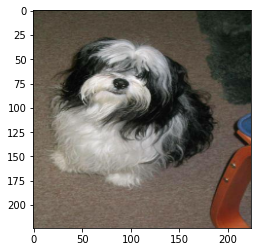

In [ ]:
image_test, label_test = process_image(X_train[0], y_train[0])
plt.imshow(image_test.numpy().astype("uint8")), unique_labels[np.argmax(label_test)]

In [ ]:
np.max(image_test), np.min(image_test)

(252.3663, 0.0)

In [ ]:
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((tf.constant(X_train), tf.constant(y_train)))
train_ds = train_ds.shuffle(buffer_size=len(X_train))
train_ds_batch = train_ds.map(process_image).batch(batch_size)
len(train_ds_batch)

25

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices((tf.constant(X_val), tf.constant(y_val)))
val_ds_batch = val_ds.map(process_image).batch(batch_size)
len(val_ds_batch)

7

In [ ]:
train_ds_batch.element_spec, val_ds_batch.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
train_ds_batch

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

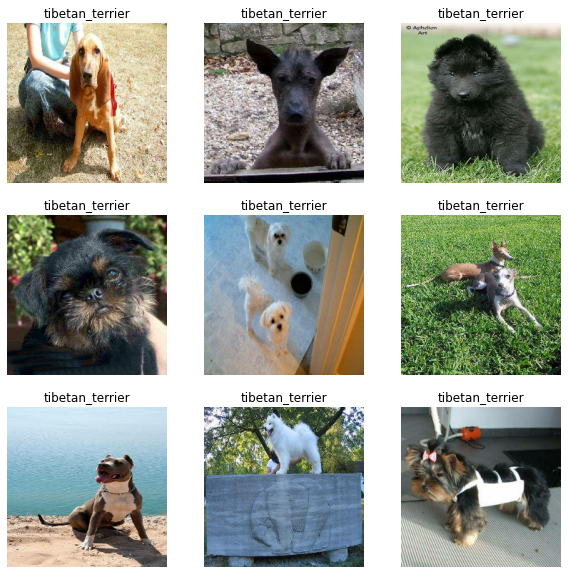

In [ ]:
plt.figure(figsize=(10,10))

for img, label in train_ds_batch.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(unique_labels[np.argmax(label_test)])
    plt.axis("off")

In [ ]:
IMG_SIZE=224

In [ ]:
# build machine learning model
INPUT_SIZE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SIZE = len(unique_labels)
Model_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# Images that are represented using floating point values are expected to have values
# in the range [0,1).
rescaling_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
def create_model(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE, model_url = Model_URL):

  print(f"Creating model using tensorflow hub model {model_url}")

  model = tf.keras.Sequential([
            rescaling_layer,
            hub.KerasLayer(model_url),
            tf.keras.layers.Dense(output_size, activation="softmax")
  ])

  model.compile(optimizer="adam",
         loss=tf.keras.losses.CategoricalCrossentropy(),
         metrics=["accuracy"])
  
  model.build(input_size) 
  
  return model

In [ ]:
model = create_model(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE, model_url=Model_URL)
model.summary()

Creating model using tensorflow hub model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
# Create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [ ]:
%load_ext tensorboard

In [ ]:
# Create tensorboard callbacks
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
NUM_EPOCHS = 30 #@param {type:"slider", min:0, max:50, step:5}

In [ ]:
# Build a function to train and return a trained model

tensorboard = create_tensorboard_callback()
# Fit the model to the data passing it to the callbacks we created
history = model.fit(x=train_ds_batch,
           epochs=NUM_EPOCHS,
           validation_data=val_ds_batch,
           validation_freq=1,
           callbacks=[tensorboard, early_stopping])

Epoch 1/30
 1/25 [>.............................] - ETA: 0s - loss: 5.7738 - accuracy: 0.0312WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


25/25 [==============================] - 549s 22s/step - loss: 4.5425 - accuracy: 0.0838 - val_loss: 3.4446 - val_accuracy: 0.2600
Epoch 2/30
25/25 [==============================] - 3s 114ms/step - loss: 1.6095 - accuracy: 0.7000 - val_loss: 2.2169 - val_accuracy: 0.5350
Epoch 3/30
25/25 [==============================] - 3s 113ms/step - loss: 0.5721 - accuracy: 0.9388 - val_loss: 1.7124 - val_accuracy: 0.6200
Epoch 4/30
25/25 [==============================] - 3s 115ms/step - loss: 0.2457 - accuracy: 0.9900 - val_loss: 1.5295 - val_accuracy: 0.6500
Epoch 5/30
25/25 [==============================] - 3s 114ms/step - loss: 0.1450 - accuracy: 0.9975 - val_loss: 1.4516 - val_accuracy: 0.6500
Epoch 6/30
25/25 [==============================] - 3s 115ms/step - loss: 0.0982 - accuracy: 1.0000 - val_loss: 1.4220 - val_accuracy: 0.6600
Epoch 7/30
25/25 [==============================] - 3s 114ms/step - loss: 0.0737 - accuracy: 1.0000 - val_loss: 1.3931 - val_accuracy: 0.6550
Epoch 8/30
25/25 

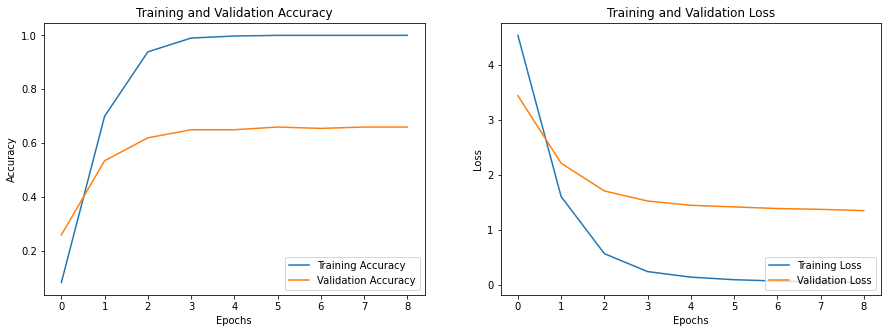

In [ ]:
# print accuracy and loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend(loc="lower right")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.subplot(1,2,2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend(loc="lower right")
plt.ylabel("Loss")
plt.xlabel("Epochs");

In [ ]:
# Clearly a overfitting problem
# Try: data-augmentation

augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2,0.3)
])

In [ ]:
def create_tuned_model(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE, model_url = Model_URL):

  print(f"Creating model using tensorflow hub model {model_url}")

  model = tf.keras.Sequential([
            augmentation_layer,
            rescaling_layer,
            hub.KerasLayer(model_url),
            tf.keras.layers.Dense(output_size, activation="softmax")
  ])

  model.compile(optimizer="adam",
         loss=tf.keras.losses.CategoricalCrossentropy(),
         metrics=["accuracy"])
  
  model.build(input_size) 
  
  return model

In [ ]:
tuned_model = create_tuned_model(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE, model_url=Model_URL)
tuned_model.summary()

Creating model using tensorflow hub model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_3 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
tuned_history = tuned_model.fit(train_ds_batch,
                 epochs=NUM_EPOCHS,
                 validation_data=val_ds_batch,
                 callbacks=[early_stopping])

Epoch 1/30
25/25 [==============================] - 4s 143ms/step - loss: 5.5285 - accuracy: 0.0350 - val_loss: 4.2037 - val_accuracy: 0.1000
Epoch 2/30
25/25 [==============================] - 3s 124ms/step - loss: 3.3825 - accuracy: 0.2325 - val_loss: 3.2970 - val_accuracy: 0.2750
Epoch 3/30
25/25 [==============================] - 3s 125ms/step - loss: 2.2248 - accuracy: 0.4550 - val_loss: 2.7335 - val_accuracy: 0.3750
Epoch 4/30
25/25 [==============================] - 3s 126ms/step - loss: 1.5939 - accuracy: 0.5987 - val_loss: 2.3814 - val_accuracy: 0.4450
Epoch 5/30
25/25 [==============================] - 3s 125ms/step - loss: 1.2356 - accuracy: 0.7175 - val_loss: 2.1605 - val_accuracy: 0.4850
Epoch 6/30
25/25 [==============================] - 3s 124ms/step - loss: 0.9800 - accuracy: 0.7575 - val_loss: 2.0604 - val_accuracy: 0.4900
Epoch 7/30
25/25 [==============================] - 3s 124ms/step - loss: 0.8036 - accuracy: 0.8012 - val_loss: 1.9390 - val_accuracy: 0.4950
Epoch 

In [ ]:
# Predict use the base model
predictions_probs = model.predict(val_ds_batch)
predictions_probs.shape

(200, 120)

In [ ]:
# Create a function return the predicted label
def get_predicted_label(predictions=predictions_probs, n=0):
  return unique_labels[np.argmax(predictions[n])]

In [ ]:
# Create a function to process batched data
def process_dataset(dataset, predictions, n=0):
  unbatched_data = dataset.unbatch()
  unbatched_data = list(unbatched_data.as_numpy_iterator())
  image = unbatched_data[n][0]/255
  label = unique_labels[np.argmax(unbatched_data[n][1])]

  confidence = predictions[n][predictions[n].argsort()[::-1][:10]]

  return image, label, confidence

(<matplotlib.image.AxesImage at 0x7f1718789550>, 'toy_terrier', 0.3811144)

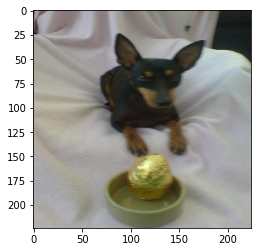

In [ ]:
image_test, label_test, confidence_test = process_dataset(val_ds_batch, predictions_probs, 9)
plt.imshow(image_test), label_test, confidence_test[0]

In [ ]:
# Create a function to plot the image and print the true and predicted label
def plot_prediction(dataset, predictions, n=0):
  predicted_label = get_predicted_label(predictions, n)
  image, true_label, confidence = process_dataset(dataset, predictions, n)

  top_10_index = predictions[n].argsort()[::-1][:10]
  top_10_values = predictions[n][top_10_index]
  top_10_labels = unique_labels[top_10_index]

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(image)
  if predicted_label == true_label:
    color = "green"
  else:
    color = "red"
  plt.title(predicted_label + " " + f"{confidence[0]*100:.2f}" + "% " + true_label, color=color)
  plt.axis("off")

  plt.subplot(1,2,2)
  top_plot = plt.bar(np.arange(len(top_10_labels)), top_10_values)
  plt.xticks(np.arange(len(top_10_labels)), labels=top_10_labels, rotation="vertical")
  if np.isin(predicted_label,top_10_labels):
    top_plot[np.argmax(predicted_label==top_10_labels)].set_color("green")


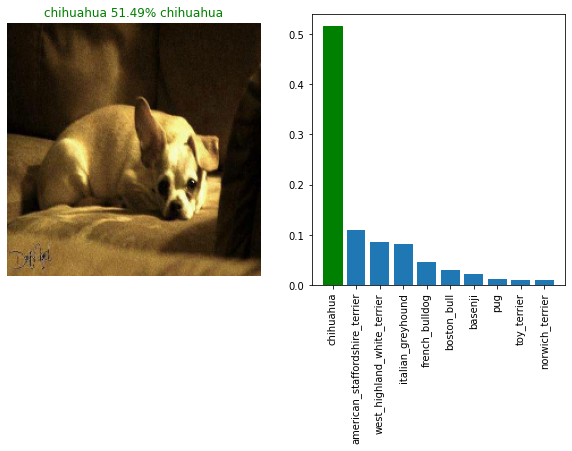

In [ ]:
plot_prediction(val_ds_batch, predictions_probs, 199)